In [3]:
 #%%

# google colab configurations 
# these might change
DATA_GENERATION = '13kwW8C01etWsqTYoE2eeFlD4Ft9YVhrw'
DATA_GENERATION_FILE = 'datageneration.py'

HELPERS = '1zskLM0-ZtEQYVI7zvd2ePqtkTOkJmVIL'
HELPERS_FILE = 'helpers.py'

EXPERIMENT = '1OrYHcTvUXHOrg-86_6oWaN2muDpuzn9a'
EXPERIMENT_FILE = 'experiment.py'

NETWORK = '1iFbCIY8IMaqO4I8mu2J7ie7UDJsLGtRv'
NETWORK_FILE = 'networks.py'

MODEL_CONFIG = '14OF6o1luI8u10Nq96FLBP1M1k-VvQKq-'
MODEL_CONFIG_FILE ='config.json'

HYPER_CONFIG = '1VWlMZnDhE9yhtBi5LrjZoZjTE6nmXsuk'
HYPER_CONFIG_FILE ='hyperparameter_tuning.json'

TUNER = '1I1K9whIpWvzWYjJQjfHLLrE9GXCuRbb1'
TUNER_FILE = 'param_tuner.py'

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    datageneration = drive.CreateFile({'id':DATA_GENERATION})
    datageneration.GetContentFile(DATA_GENERATION_FILE)
    

    helpers = drive.CreateFile({'id':HELPERS})
    helpers.GetContentFile(HELPERS_FILE)

    network = drive.CreateFile({'id':NETWORK})
    network.GetContentFile(NETWORK_FILE)

    experiment = drive.CreateFile({'id':EXPERIMENT})
    experiment.GetContentFile(EXPERIMENT_FILE)

    model_json = drive.CreateFile({'id':MODEL_CONFIG})
    model_json.GetContentFile(MODEL_CONFIG_FILE)

    hyper_json = drive.CreateFile({'id':HYPER_CONFIG})
    hyper_json.GetContentFile(HYPER_CONFIG_FILE)

    param_tuner = drive.CreateFile({'id':TUNER})
    param_tuner.GetContentFile(TUNER_FILE)
    


Running on Colab?
no


In [4]:
# custom imports
from experiment import Experiment
from datageneration import DataGenerator
from helpers import Helper


# torch imports
import torch
from torch.utils import data


# import utils
import json
from datetime import date
import os
import sys

# common ml libraries
import pandas as pd
import numpy as np

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_director = ''
else:
    config_director = 'configs/'

with open(f'{config_director}config.json') as f:
    file = f.read()
    default_conf = json.loads(file)


In [5]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    conf['default']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')

No GPU available, training on CPU


## Generating a dataset

In [6]:
# reading in the data 
CONFIGURATION='city_weather_configs'

BASE_DIR = default_conf[CONFIGURATION]['dataset_params']['base_dir']
DATA_DIR = default_conf[CONFIGURATION]['dataset_params']['data_dir']
EXTENSION = default_conf[CONFIGURATION]['dataset_params']['extension']
DATA_FILE = default_conf[CONFIGURATION]['dataset_params']['data_file']
func_x = pd.read_csv(os.path.join(BASE_DIR, DATA_DIR, EXTENSION, DATA_FILE)).to_numpy()
func_x = torch.from_numpy(func_x).unsqueeze(-1).type(torch.FloatTensor)

num_batches = func_x.shape[0]
x_range = func_x.shape[1]

x_values = torch.arange(0, x_range).type(torch.FloatTensor).unsqueeze(-1)
x_values = x_values.repeat(num_batches, 1, 1)

In [7]:
random_indeces = torch.randperm(num_batches)
train_indeces = random_indeces[:80]
vali_indeces = random_indeces[80:90]
test_indeces = random_indeces[90:]


In [8]:
train_dataset = data.TensorDataset(x_values[train_indeces], func_x[train_indeces])
trainloader = data.DataLoader(train_dataset, batch_size=80)

In [9]:
vali_dataset = data.TensorDataset(x_values[train_indeces], func_x[train_indeces])
valiloader = data.DataLoader(train_dataset, batch_size=10)

In [10]:
# creating an instance of to orchestrate the training
trainer = Experiment(**default_conf[CONFIGURATION]['experiment_params'])

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 33.614933013916016
True
 Validation loss after 0 equals 5.002982795238495


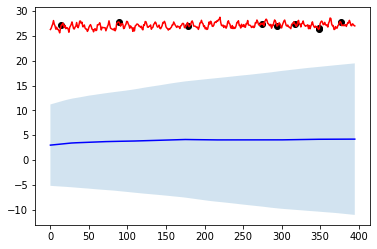

  0%|          | 990/200000 [00:08<28:20, 117.05it/s] 

Mean loss at epoch 1000 : 3.3409550189971924
True
 Validation loss after 1000 equals 3.395868957042694


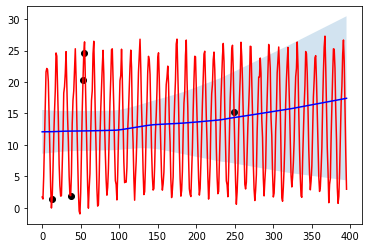

  1%|          | 1990/200000 [00:17<28:40, 115.07it/s]

Mean loss at epoch 2000 : 3.2911465167999268
True
 Validation loss after 2000 equals 3.3158557415008545


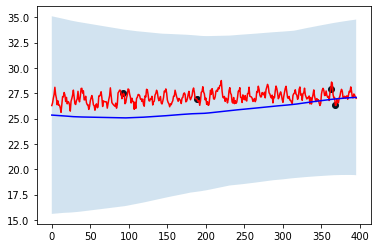

  1%|▏         | 2994/200000 [00:26<28:08, 116.65it/s]

Mean loss at epoch 3000 : 3.8668224811553955
True
 Validation loss after 3000 equals 3.258469432592392


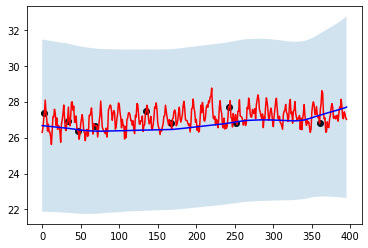

  2%|▏         | 3991/200000 [00:35<27:56, 116.89it/s]

Mean loss at epoch 4000 : 3.271474838256836
True
 Validation loss after 4000 equals 3.448565900325775


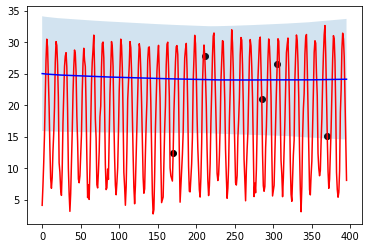

  2%|▏         | 4993/200000 [00:45<28:11, 115.30it/s]

Mean loss at epoch 5000 : 3.129939079284668
True
 Validation loss after 5000 equals 3.3284480571746826


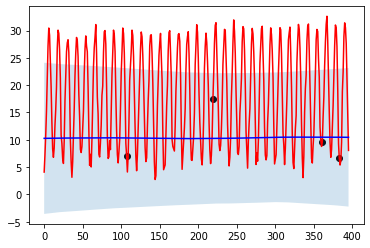

  3%|▎         | 5999/200000 [00:54<28:54, 111.85it/s]

Mean loss at epoch 6000 : 3.16449236869812
True
 Validation loss after 6000 equals 3.267945259809494


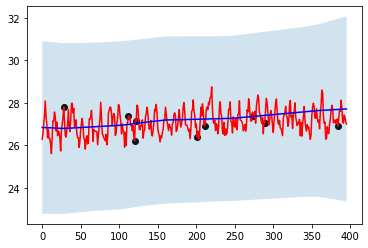

  3%|▎         | 6990/200000 [01:03<29:07, 110.45it/s]

Mean loss at epoch 7000 : 3.5705041885375977
True
 Validation loss after 7000 equals 3.2873831689357758


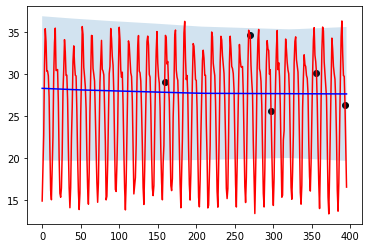

  4%|▍         | 7998/200000 [01:12<27:21, 116.93it/s]

Mean loss at epoch 8000 : 3.2920196056365967
True
 Validation loss after 8000 equals 3.2739337980747223


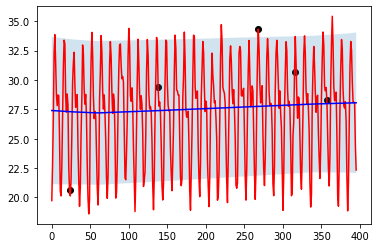

  4%|▍         | 8989/200000 [01:21<26:18, 121.00it/s]

Mean loss at epoch 9000 : 3.1594913005828857
True
 Validation loss after 9000 equals 3.4875178039073944


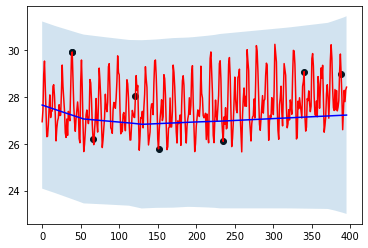

  5%|▍         | 9998/200000 [01:30<28:08, 112.50it/s]

Mean loss at epoch 10000 : 3.3564531803131104
True
 Validation loss after 10000 equals 3.2453499138355255


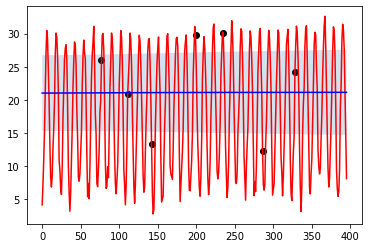

  5%|▌         | 10992/200000 [01:39<27:46, 113.39it/s]

Mean loss at epoch 11000 : 3.2645721435546875
True
 Validation loss after 11000 equals 3.2950093746185303


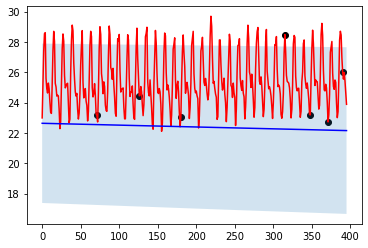

  6%|▌         | 11999/200000 [01:48<27:38, 113.33it/s]

Mean loss at epoch 12000 : 3.384429693222046
True
 Validation loss after 12000 equals 3.341961920261383


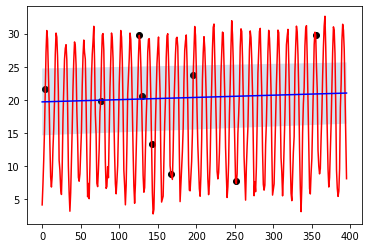

  6%|▋         | 12993/200000 [01:58<30:24, 102.47it/s]

Mean loss at epoch 13000 : 3.184128522872925
True
 Validation loss after 13000 equals 3.319834887981415


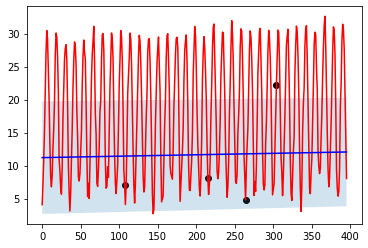

  7%|▋         | 13993/200000 [02:08<29:08, 106.37it/s]

Mean loss at epoch 14000 : 2.9704430103302
True
 Validation loss after 14000 equals 3.2913754880428314


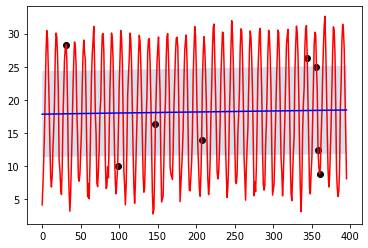

  7%|▋         | 14990/200000 [02:18<30:41, 100.46it/s]

Mean loss at epoch 15000 : 3.341254234313965
True
 Validation loss after 15000 equals 3.259208917617798


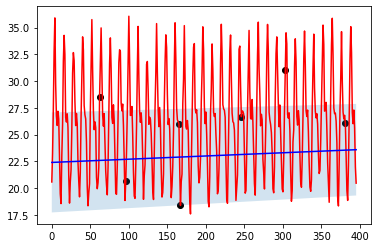

  8%|▊         | 15997/200000 [02:31<33:49, 90.66it/s]  

Mean loss at epoch 16000 : 3.1610565185546875
True
 Validation loss after 16000 equals 3.2123186588287354


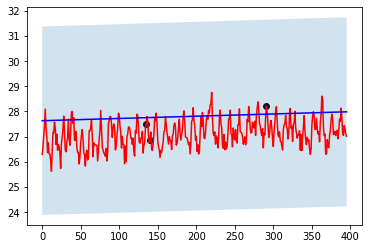

  8%|▊         | 16994/200000 [02:43<52:13, 58.41it/s]  

Mean loss at epoch 17000 : 2.9822323322296143
True
 Validation loss after 17000 equals 3.1975165605545044


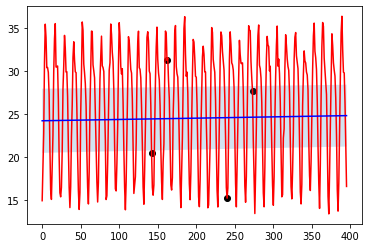

  9%|▉         | 18000/200000 [02:54<30:17, 100.13it/s] 

Mean loss at epoch 18000 : 3.1881790161132812
True
 Validation loss after 18000 equals 3.2165486812591553


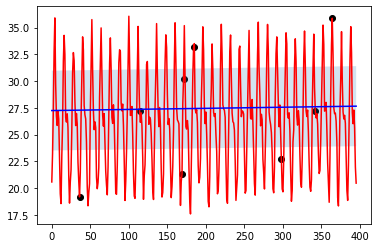

  9%|▉         | 18997/200000 [03:04<27:02, 111.55it/s]

Mean loss at epoch 19000 : 3.149810552597046
True
 Validation loss after 19000 equals 3.263558506965637


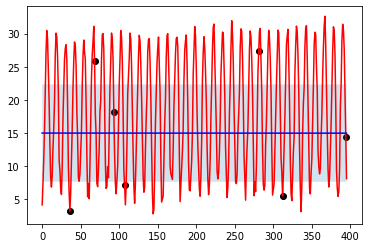

 10%|█         | 20000/200000 [03:14<30:49, 97.32it/s] 

Mean loss at epoch 20000 : 3.2118096351623535
True
 Validation loss after 20000 equals 3.202605277299881


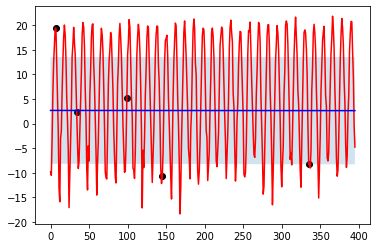

 10%|█         | 20997/200000 [03:24<28:18, 105.37it/s]

Mean loss at epoch 21000 : 3.021754026412964
True
 Validation loss after 21000 equals 3.285641074180603


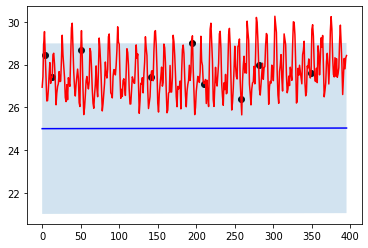

 11%|█         | 21997/200000 [03:34<27:17, 108.71it/s]

Mean loss at epoch 22000 : 2.976661205291748
True
 Validation loss after 22000 equals 3.5314249396324158


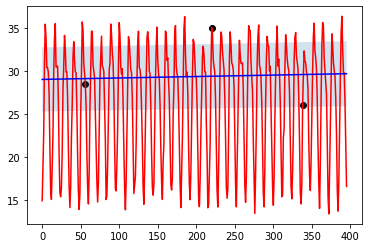

 11%|█▏        | 22998/200000 [03:44<28:16, 104.32it/s]

Mean loss at epoch 23000 : 3.665994167327881
True
 Validation loss after 23000 equals 3.265938103199005


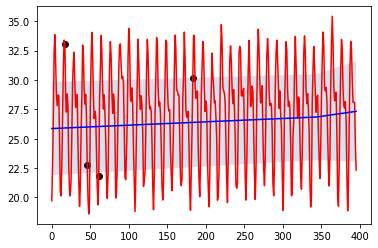

 12%|█▏        | 23997/200000 [03:54<29:35, 99.10it/s] 

Mean loss at epoch 24000 : 3.292360544204712
True
 Validation loss after 24000 equals 3.3211160004138947


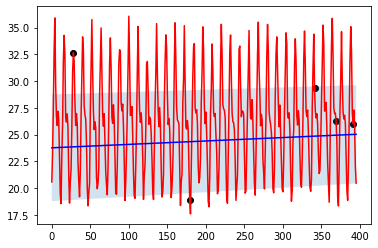

 12%|█▏        | 24994/200000 [04:04<26:22, 110.59it/s]

Mean loss at epoch 25000 : 3.149188995361328
True
 Validation loss after 25000 equals 3.2070546448230743


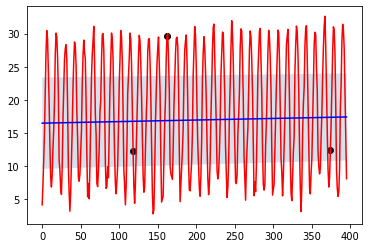

 13%|█▎        | 25993/200000 [04:14<29:04, 99.74it/s] 

Mean loss at epoch 26000 : 3.2289297580718994
True
 Validation loss after 26000 equals 3.314498007297516


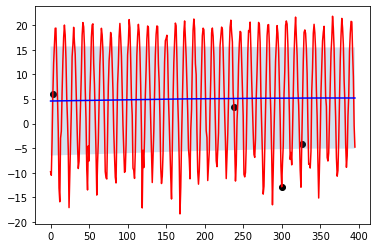

 13%|█▎        | 26996/200000 [04:25<26:38, 108.23it/s]

Mean loss at epoch 27000 : 3.0794787406921387
True
 Validation loss after 27000 equals 3.286833107471466


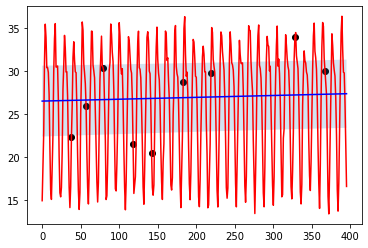

 14%|█▍        | 27997/200000 [04:34<25:51, 110.83it/s]

Mean loss at epoch 28000 : 2.972672462463379
True
 Validation loss after 28000 equals 3.1609060168266296


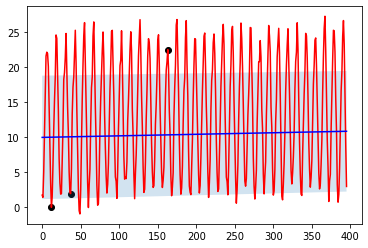

 14%|█▍        | 29000/200000 [04:45<27:53, 102.21it/s]

Mean loss at epoch 29000 : 3.2989139556884766
True
 Validation loss after 29000 equals 3.2013756036758423


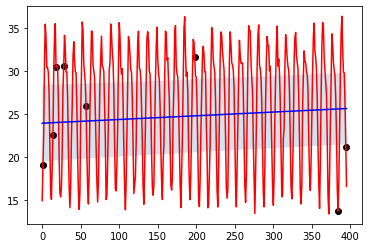

 15%|█▍        | 29998/200000 [04:54<26:00, 108.96it/s]

Mean loss at epoch 30000 : 3.070155382156372
True
 Validation loss after 30000 equals 3.179067999124527


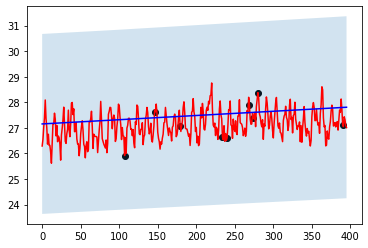

 15%|█▌        | 30991/200000 [05:04<25:48, 109.16it/s]

Mean loss at epoch 31000 : 3.114020586013794
True
 Validation loss after 31000 equals 3.2910796403884888


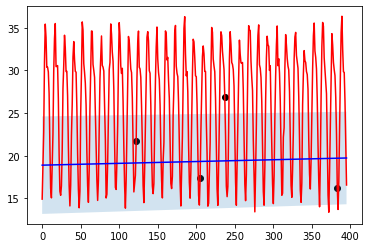

 16%|█▌        | 31993/200000 [05:14<33:05, 84.63it/s] 

Mean loss at epoch 32000 : 3.476600170135498
True
 Validation loss after 32000 equals 3.232127457857132


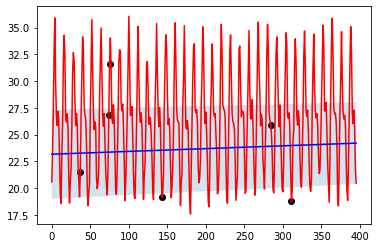

 16%|█▋        | 32995/200000 [05:24<28:21, 98.14it/s] 

Mean loss at epoch 33000 : 3.2869656085968018
True
 Validation loss after 33000 equals 3.196381002664566


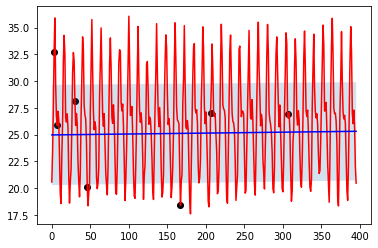

 17%|█▋        | 34000/200000 [05:35<28:59, 95.45it/s]  

Mean loss at epoch 34000 : 3.0120372772216797
True
 Validation loss after 34000 equals 3.181527405977249


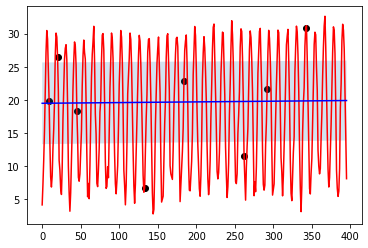

 17%|█▋        | 34990/200000 [05:45<25:32, 107.64it/s]

Mean loss at epoch 35000 : 2.9750330448150635
True
 Validation loss after 35000 equals 3.228603333234787


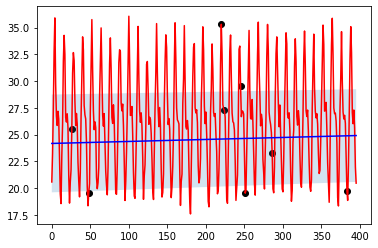

 18%|█▊        | 35997/200000 [05:55<25:04, 108.98it/s]

Mean loss at epoch 36000 : 3.1409642696380615
True
 Validation loss after 36000 equals 3.1836971938610077


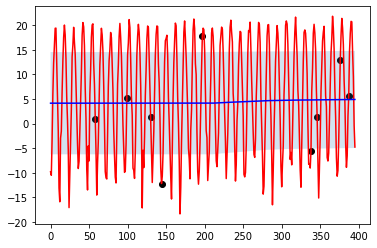

 18%|█▊        | 36999/200000 [06:05<25:21, 107.14it/s]

Mean loss at epoch 37000 : 3.159580945968628
True
 Validation loss after 37000 equals 3.217650890350342


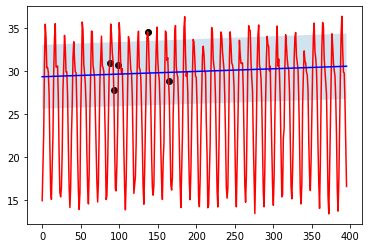

 19%|█▉        | 37994/200000 [06:15<25:20, 106.57it/s]

Mean loss at epoch 38000 : 2.904733180999756
True
 Validation loss after 38000 equals 3.1954081058502197


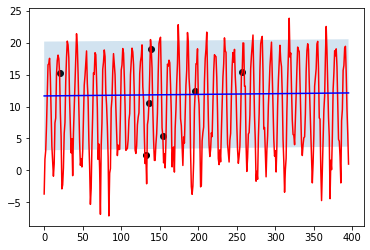

 19%|█▉        | 38989/200000 [06:24<23:22, 114.80it/s]

Mean loss at epoch 39000 : 3.2365992069244385
True
 Validation loss after 39000 equals 3.360236883163452


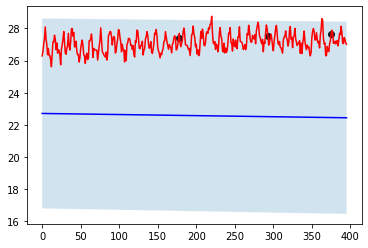

 20%|█▉        | 39994/200000 [06:34<24:40, 108.09it/s]

Mean loss at epoch 40000 : 3.3452467918395996
True
 Validation loss after 40000 equals 3.343411475419998


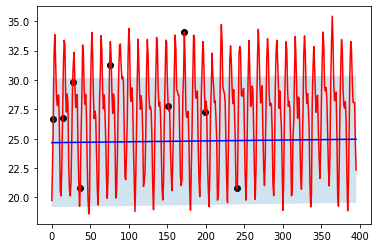

 20%|██        | 40991/200000 [06:44<25:30, 103.92it/s]

Mean loss at epoch 41000 : 3.105158567428589
True
 Validation loss after 41000 equals 3.2374372482299805


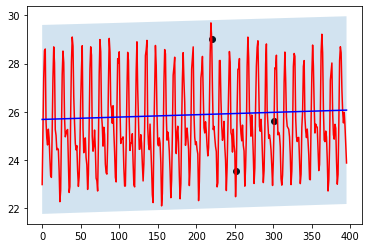

 21%|██        | 41993/200000 [06:54<24:27, 107.64it/s]

Mean loss at epoch 42000 : 3.2349390983581543
True
 Validation loss after 42000 equals 3.2127239108085632


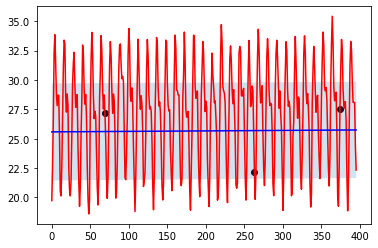

 21%|██▏       | 42995/200000 [07:04<22:56, 114.05it/s] 

Mean loss at epoch 43000 : 3.428574800491333
True
 Validation loss after 43000 equals 3.1834524273872375


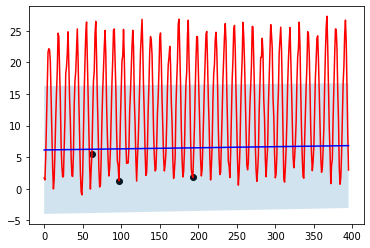

 22%|██▏       | 43994/200000 [07:13<23:11, 112.15it/s]

Mean loss at epoch 44000 : 3.1799838542938232
True
 Validation loss after 44000 equals 3.265908569097519


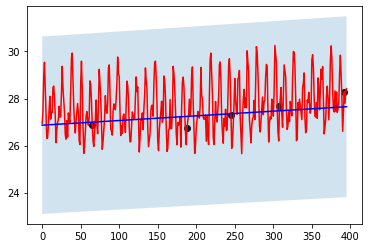

 22%|██▏       | 44992/200000 [07:21<21:40, 119.23it/s]

Mean loss at epoch 45000 : 3.0532500743865967
True
 Validation loss after 45000 equals 3.8405856490135193


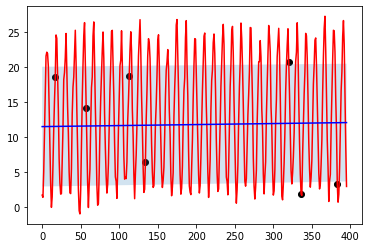

 23%|██▎       | 45995/200000 [07:30<22:18, 115.08it/s]

Mean loss at epoch 46000 : 2.905385971069336
True
 Validation loss after 46000 equals 3.207107275724411


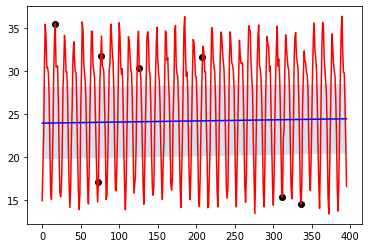

 23%|██▎       | 46995/200000 [07:39<24:01, 106.14it/s]

Mean loss at epoch 47000 : 3.0959296226501465
True
 Validation loss after 47000 equals 3.5161686837673187


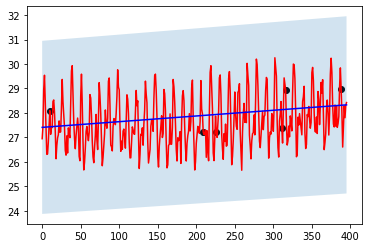

 24%|██▍       | 47998/200000 [07:48<22:50, 110.92it/s]

Mean loss at epoch 48000 : 3.210106134414673
True
 Validation loss after 48000 equals 3.2316636443138123


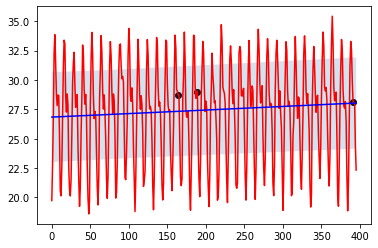

 24%|██▍       | 48999/200000 [07:57<22:04, 114.02it/s]

Mean loss at epoch 49000 : 2.92246150970459
True
 Validation loss after 49000 equals 3.1918631494045258


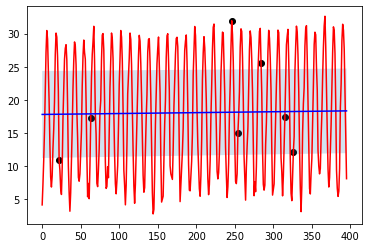

 25%|██▍       | 49994/200000 [08:06<20:14, 123.54it/s]

Mean loss at epoch 50000 : 3.1980719566345215
True
 Validation loss after 50000 equals 3.195858746767044


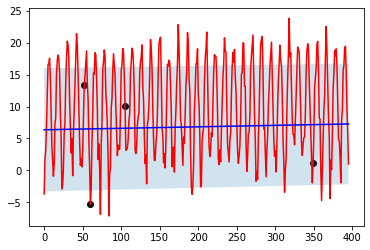

 25%|██▌       | 50991/200000 [08:14<21:23, 116.12it/s]

Mean loss at epoch 51000 : 3.160496711730957
True
 Validation loss after 51000 equals 3.1992621421813965


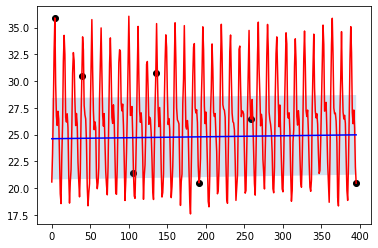

 26%|██▌       | 51998/200000 [08:24<38:23, 64.26it/s] 

Mean loss at epoch 52000 : 3.1060848236083984
True
 Validation loss after 52000 equals 3.200097292661667


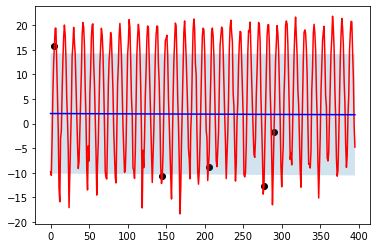

 26%|██▋       | 52993/200000 [08:40<28:44, 85.23it/s]  

Mean loss at epoch 53000 : 3.293682813644409
True
 Validation loss after 53000 equals 3.1936075687408447


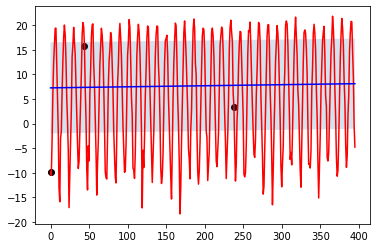

 27%|██▋       | 54000/200000 [08:49<32:40, 74.45it/s] 

Mean loss at epoch 54000 : 3.1405069828033447
True
 Validation loss after 54000 equals 3.181209295988083


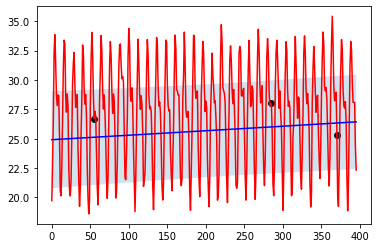

 27%|██▋       | 54997/200000 [09:02<21:13, 113.85it/s] 

Mean loss at epoch 55000 : 3.3189234733581543
True
 Validation loss after 55000 equals 3.231874167919159


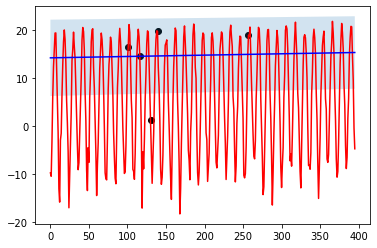

 28%|██▊       | 55993/200000 [09:11<20:09, 119.09it/s]

Mean loss at epoch 56000 : 3.005579948425293
True
 Validation loss after 56000 equals 3.3327478766441345


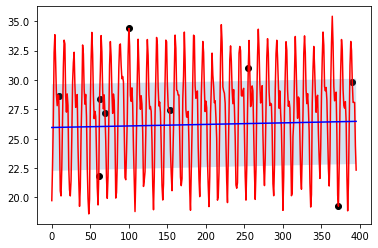

 28%|██▊       | 56991/200000 [09:21<20:57, 113.77it/s]

Mean loss at epoch 57000 : 3.384133815765381
True
 Validation loss after 57000 equals 3.1886390447616577


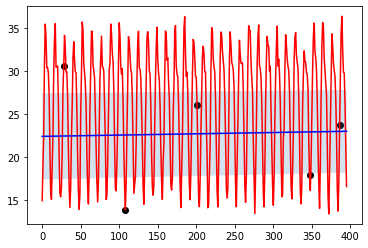

 29%|██▉       | 57991/200000 [09:33<24:55, 94.94it/s]  

Mean loss at epoch 58000 : 3.024456262588501
True
 Validation loss after 58000 equals 3.1973897516727448


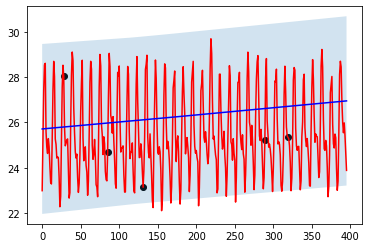

 29%|██▉       | 58997/200000 [09:45<22:07, 106.24it/s]

Mean loss at epoch 59000 : 3.0469720363616943
True
 Validation loss after 59000 equals 3.22548109292984


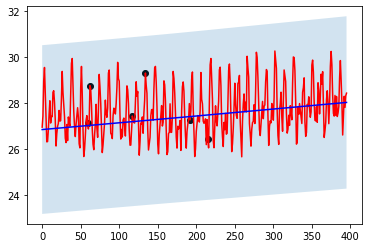

 30%|██▉       | 59993/200000 [09:56<30:47, 75.77it/s] 

Mean loss at epoch 60000 : 3.2394027709960938
True
 Validation loss after 60000 equals 3.3392674922943115


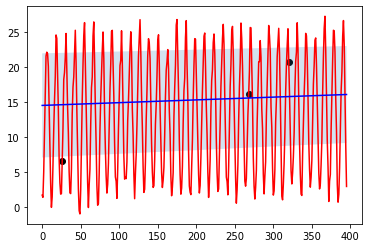

 30%|███       | 60989/200000 [10:07<23:17, 99.46it/s]  

Mean loss at epoch 61000 : 3.1695637702941895
True
 Validation loss after 61000 equals 3.284857362508774


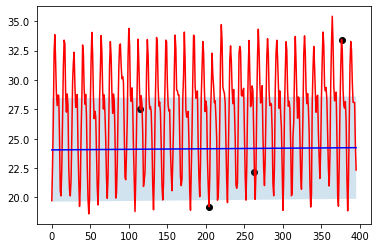

 31%|███       | 61995/200000 [10:17<22:20, 102.96it/s]

Mean loss at epoch 62000 : 3.2070834636688232
True
 Validation loss after 62000 equals 3.231343388557434


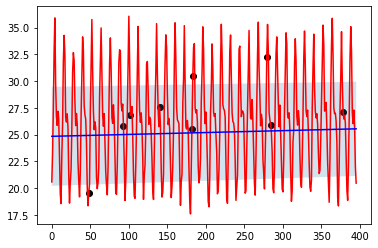

 31%|███▏      | 62998/200000 [10:27<24:29, 93.22it/s] 

Mean loss at epoch 63000 : 3.10910701751709
True
 Validation loss after 63000 equals 3.2028171122074127


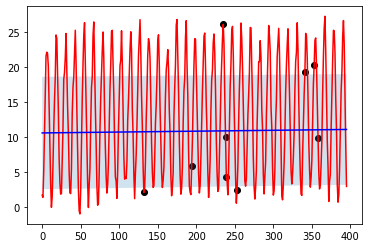

 32%|███▏      | 63993/200000 [10:37<23:33, 96.20it/s] 

Mean loss at epoch 64000 : 3.1625757217407227
True
 Validation loss after 64000 equals 3.236660659313202


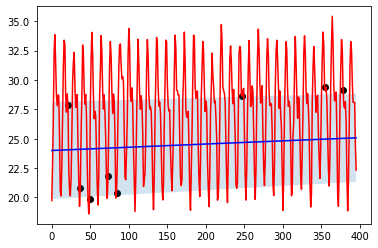

 32%|███▏      | 64996/200000 [10:47<22:01, 102.16it/s]

Mean loss at epoch 65000 : 3.3144633769989014
True
 Validation loss after 65000 equals 3.260343074798584


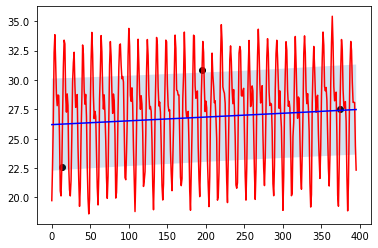

 33%|███▎      | 65994/200000 [10:57<21:15, 105.05it/s]

Mean loss at epoch 66000 : 2.9652740955352783
True
 Validation loss after 66000 equals 3.1778571009635925


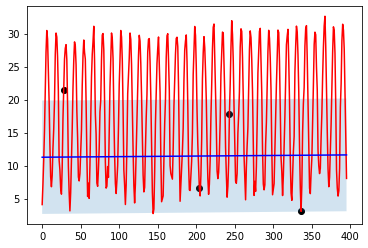

 33%|███▎      | 66995/200000 [11:07<21:12, 104.52it/s]

Mean loss at epoch 67000 : 3.2162811756134033
True
 Validation loss after 67000 equals 3.267613261938095


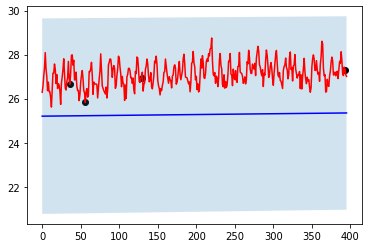

 34%|███▍      | 67991/200000 [11:17<21:06, 104.27it/s]

Mean loss at epoch 68000 : 3.0078353881835938
True
 Validation loss after 68000 equals 3.1629869639873505


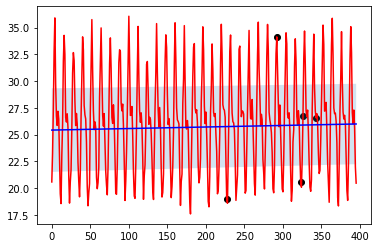

 34%|███▍      | 68997/200000 [11:27<20:17, 107.58it/s]

Mean loss at epoch 69000 : 3.2150673866271973
True
 Validation loss after 69000 equals 3.140109032392502


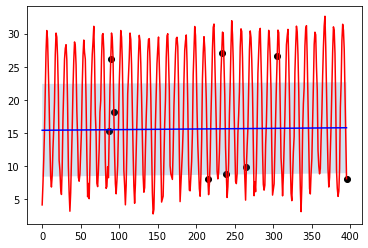

 35%|███▍      | 69990/200000 [11:36<20:47, 104.19it/s]

Mean loss at epoch 70000 : 2.9733619689941406
True
 Validation loss after 70000 equals 3.385763019323349


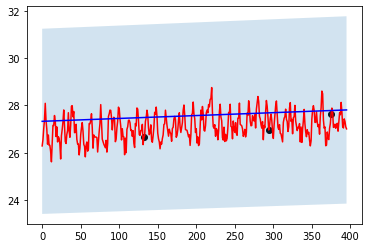

 35%|███▌      | 70994/200000 [11:46<21:24, 100.43it/s]

Mean loss at epoch 71000 : 3.1947991847991943
True
 Validation loss after 71000 equals 3.2363139390945435


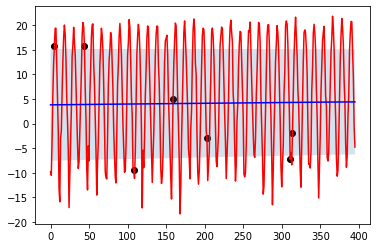

 36%|███▌      | 71998/200000 [11:56<20:33, 103.76it/s]

Mean loss at epoch 72000 : 3.4468019008636475
True
 Validation loss after 72000 equals 3.2376936972141266


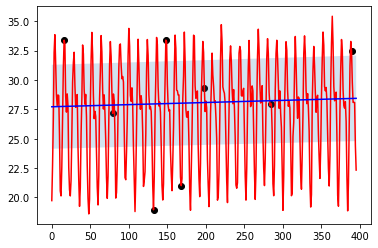

 36%|███▋      | 72996/200000 [12:06<20:59, 100.81it/s]

Mean loss at epoch 73000 : 3.1947391033172607
True
 Validation loss after 73000 equals 3.239373028278351


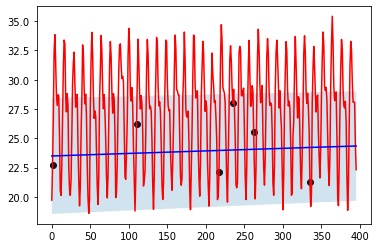

 37%|███▋      | 73995/200000 [12:16<19:05, 110.02it/s]

Mean loss at epoch 74000 : 3.045346736907959
True
 Validation loss after 74000 equals 3.2250843048095703


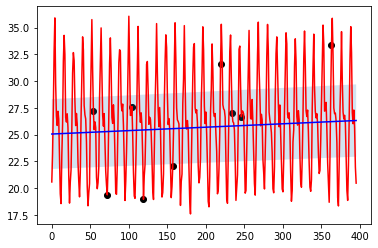

 37%|███▋      | 74993/200000 [12:25<20:09, 103.38it/s]

Mean loss at epoch 75000 : 3.2146825790405273
True
 Validation loss after 75000 equals 3.1970205307006836


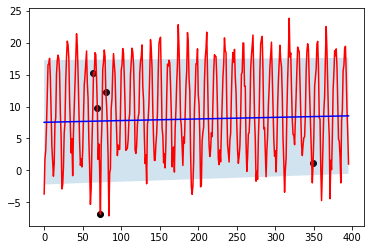

 38%|███▊      | 76000/200000 [12:36<27:36, 74.86it/s] 

Mean loss at epoch 76000 : 3.262671947479248
True
 Validation loss after 76000 equals 3.329357147216797


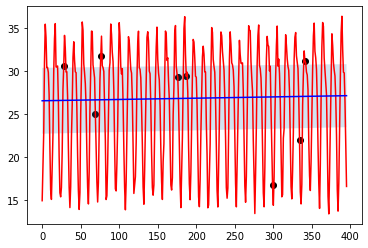

 38%|███▊      | 76993/200000 [12:48<19:12, 106.77it/s] 

Mean loss at epoch 77000 : 3.181614875793457
True
 Validation loss after 77000 equals 3.1897009015083313


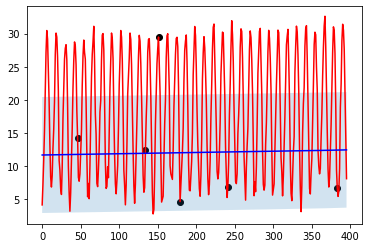

 39%|███▉      | 77994/200000 [12:58<19:44, 102.99it/s]

Mean loss at epoch 78000 : 3.2059247493743896
True
 Validation loss after 78000 equals 3.2495096921920776


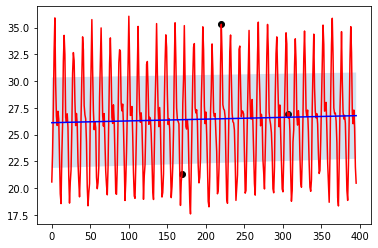

 39%|███▉      | 78994/200000 [13:09<19:22, 104.13it/s]

Mean loss at epoch 79000 : 2.9450385570526123
True
 Validation loss after 79000 equals 3.1983782947063446


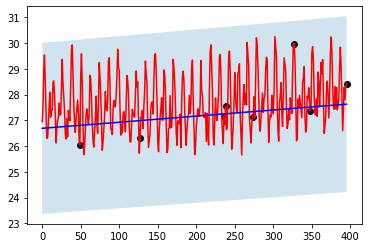

 40%|███▉      | 79999/200000 [13:19<19:18, 103.54it/s]

Mean loss at epoch 80000 : 3.067422389984131
True
 Validation loss after 80000 equals 3.256146252155304


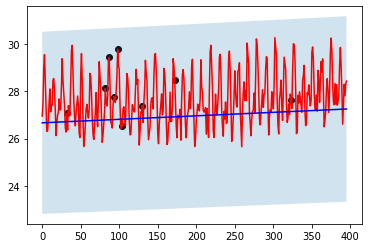

 40%|████      | 80996/200000 [13:29<19:35, 101.22it/s]

Mean loss at epoch 81000 : 3.077470541000366
True
 Validation loss after 81000 equals 3.2627267837524414


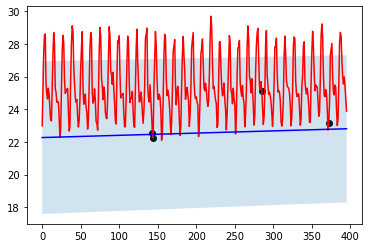

 41%|████      | 81993/200000 [13:39<20:36, 95.44it/s] 

Mean loss at epoch 82000 : 3.36702561378479
True
 Validation loss after 82000 equals 3.183942973613739


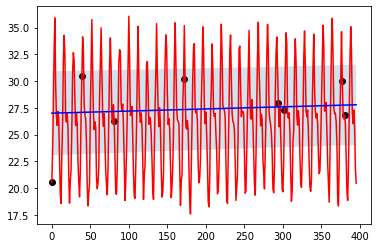

 41%|████▏     | 82991/200000 [13:49<18:27, 105.61it/s]

Mean loss at epoch 83000 : 3.253500461578369
True
 Validation loss after 83000 equals 3.3232476115226746


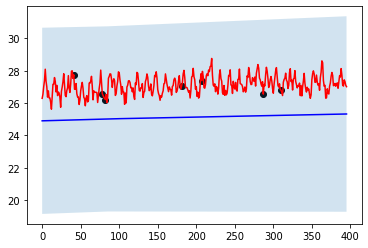

 42%|████▏     | 83995/200000 [13:59<19:23, 99.74it/s] 

Mean loss at epoch 84000 : 3.023866891860962
True
 Validation loss after 84000 equals 3.216424286365509


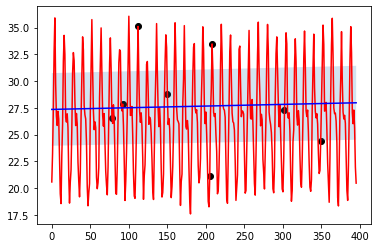

 42%|████▏     | 84994/200000 [14:09<17:56, 106.82it/s]

Mean loss at epoch 85000 : 3.1715033054351807
True
 Validation loss after 85000 equals 3.2711488902568817


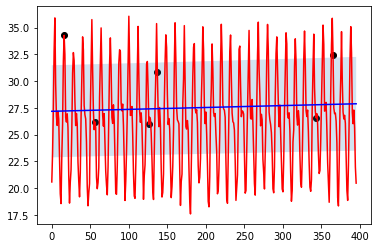

 43%|████▎     | 85990/200000 [14:19<17:45, 106.97it/s]

Mean loss at epoch 86000 : 2.906425952911377
True
 Validation loss after 86000 equals 3.4918572306632996


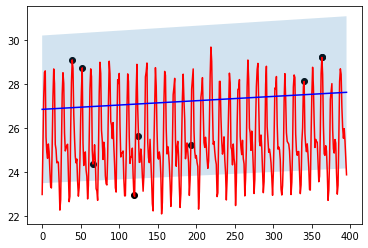

 43%|████▎     | 86997/200000 [14:29<18:51, 99.88it/s] 

Mean loss at epoch 87000 : 3.092175006866455
True
 Validation loss after 87000 equals 3.2385471761226654


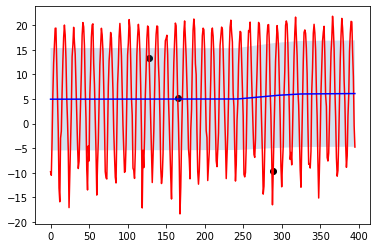

 44%|████▍     | 87993/200000 [14:39<19:32, 95.49it/s] 

Mean loss at epoch 88000 : 3.1370863914489746
True
 Validation loss after 88000 equals 3.186269700527191


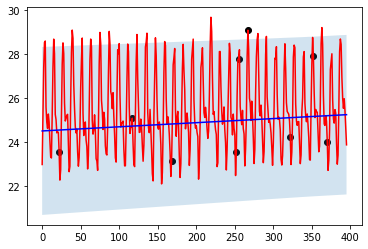

 44%|████▍     | 88994/200000 [14:51<19:53, 92.99it/s] 

Mean loss at epoch 89000 : 3.5856359004974365
True
 Validation loss after 89000 equals 3.2798227667808533


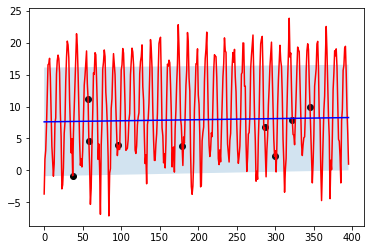

 45%|████▌     | 90000/200000 [15:02<19:11, 95.54it/s] 

Mean loss at epoch 90000 : 3.05287504196167
True
 Validation loss after 90000 equals 3.1689967215061188


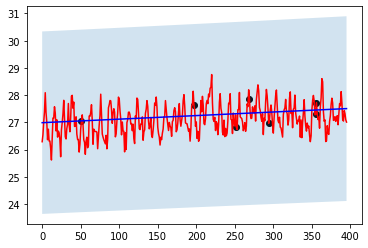

 45%|████▌     | 90992/200000 [15:12<17:29, 103.88it/s]

Mean loss at epoch 91000 : 3.3801608085632324
True
 Validation loss after 91000 equals 3.2005213499069214


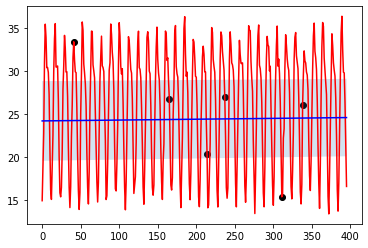

 46%|████▌     | 92000/200000 [15:22<17:03, 105.54it/s]

Mean loss at epoch 92000 : 3.0635104179382324
True
 Validation loss after 92000 equals 3.214043080806732


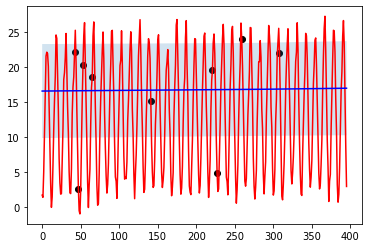

 46%|████▋     | 92992/200000 [15:32<16:47, 106.17it/s]

Mean loss at epoch 93000 : 3.041766881942749
True
 Validation loss after 93000 equals 3.358212113380432


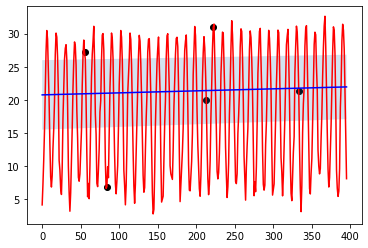

 47%|████▋     | 93989/200000 [15:42<17:19, 102.00it/s]

Mean loss at epoch 94000 : 3.0185554027557373
True
 Validation loss after 94000 equals 3.1697290539741516


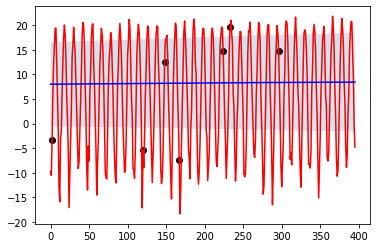

 48%|████▊     | 95000/200000 [15:52<17:53, 97.77it/s] 

Mean loss at epoch 95000 : 3.068726062774658
True
 Validation loss after 95000 equals 3.23916295170784


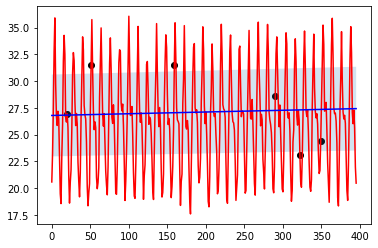

 48%|████▊     | 95989/200000 [16:02<17:46, 97.57it/s] 

Mean loss at epoch 96000 : 2.7984817028045654
True
 Validation loss after 96000 equals 3.3470534682273865


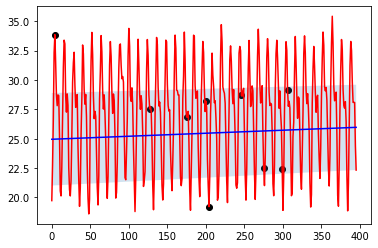

 48%|████▊     | 96991/200000 [16:12<18:28, 92.90it/s] 

Mean loss at epoch 97000 : 3.0466535091400146
True
 Validation loss after 97000 equals 3.250098407268524


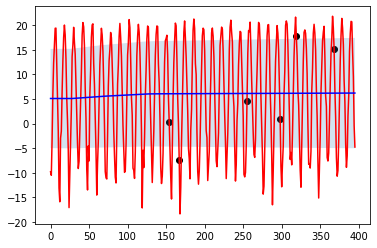

 49%|████▉     | 97996/200000 [16:22<17:16, 98.44it/s] 

Mean loss at epoch 98000 : 3.233485460281372
True
 Validation loss after 98000 equals 3.258148193359375


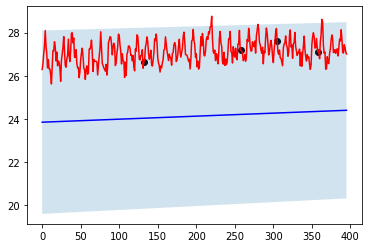

 49%|████▉     | 98998/200000 [16:33<17:27, 96.39it/s] 

Mean loss at epoch 99000 : 3.098268508911133
True
 Validation loss after 99000 equals 3.2598550021648407


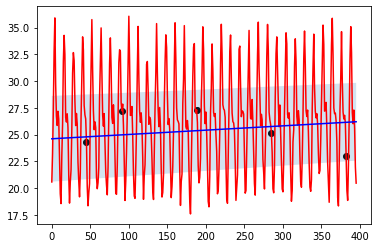

 50%|████▉     | 99999/200000 [16:44<18:32, 89.87it/s] 

Mean loss at epoch 100000 : 3.0860204696655273
True
 Validation loss after 100000 equals 3.2055739164352417


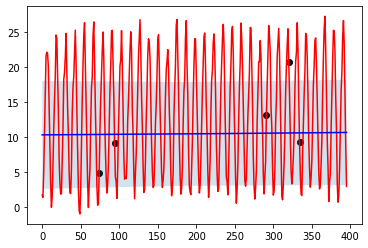

 50%|█████     | 100993/200000 [16:54<15:54, 103.69it/s]

Mean loss at epoch 101000 : 3.306690216064453
True
 Validation loss after 101000 equals 3.212935298681259


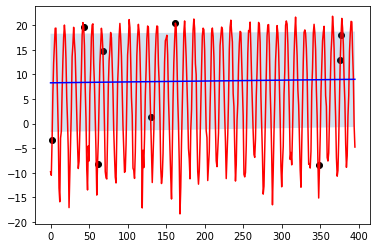

 51%|█████     | 101998/200000 [17:04<18:11, 89.82it/s] 

Mean loss at epoch 102000 : 3.1486001014709473
True
 Validation loss after 102000 equals 3.193064123392105


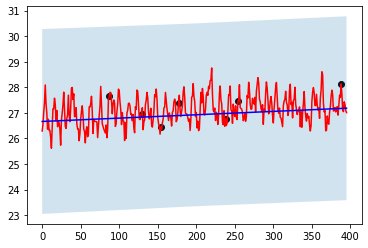

 51%|█████▏    | 102995/200000 [17:14<15:19, 105.45it/s]

Mean loss at epoch 103000 : 3.2664129734039307
True
 Validation loss after 103000 equals 3.209496021270752


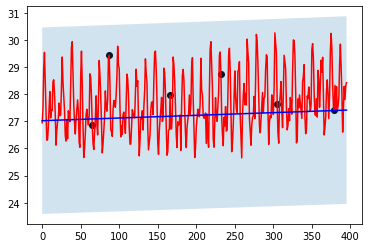

 52%|█████▏    | 103991/200000 [17:24<15:56, 100.42it/s]

Mean loss at epoch 104000 : 3.1098761558532715
True
 Validation loss after 104000 equals 3.180607110261917


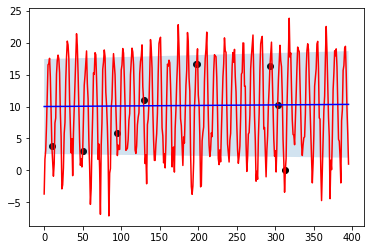

 52%|█████▏    | 104989/200000 [17:34<15:21, 103.10it/s]

Mean loss at epoch 105000 : 3.181708335876465
True
 Validation loss after 105000 equals 3.178605616092682


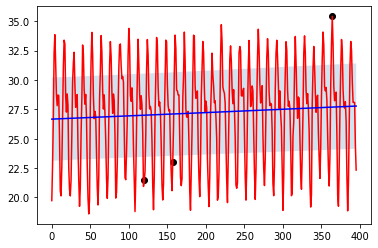

 53%|█████▎    | 105995/200000 [17:44<14:47, 105.96it/s]

Mean loss at epoch 106000 : 3.0527586936950684
True
 Validation loss after 106000 equals 3.1537807881832123


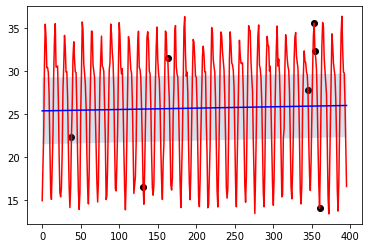

 53%|█████▎    | 106991/200000 [17:54<15:08, 102.32it/s]

Mean loss at epoch 107000 : 3.019848346710205
True
 Validation loss after 107000 equals 3.2538237869739532


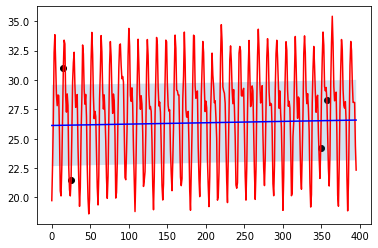

 54%|█████▍    | 107991/200000 [18:04<14:34, 105.20it/s]

Mean loss at epoch 108000 : 3.1865041255950928
True
 Validation loss after 108000 equals 3.157072514295578


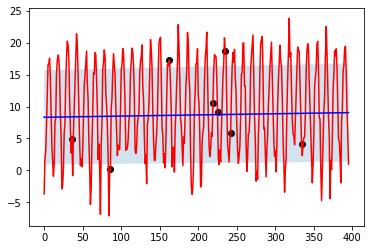

 54%|█████▍    | 108997/200000 [18:15<14:46, 102.64it/s]

Mean loss at epoch 109000 : 3.33206844329834
True
 Validation loss after 109000 equals 3.3040482699871063


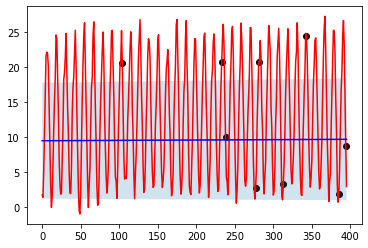

 55%|█████▍    | 109993/200000 [18:25<14:20, 104.62it/s]

Mean loss at epoch 110000 : 3.195284366607666
True
 Validation loss after 110000 equals 3.294411987066269


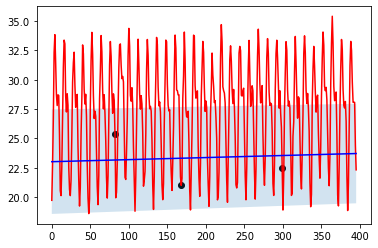

 55%|█████▌    | 110996/200000 [18:35<15:02, 98.59it/s] 

Mean loss at epoch 111000 : 3.318528175354004
True
 Validation loss after 111000 equals 3.1965014934539795


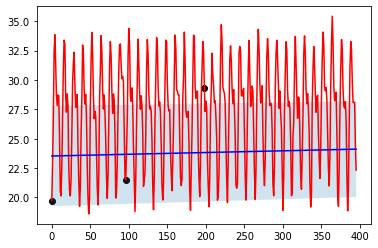

 56%|█████▌    | 111990/200000 [18:46<15:16, 96.03it/s] 

Mean loss at epoch 112000 : 3.138272762298584
True
 Validation loss after 112000 equals 3.4152223765850067


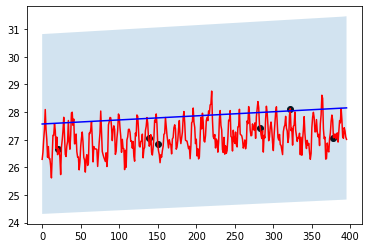

 56%|█████▋    | 113000/200000 [18:57<14:43, 98.51it/s] 

Mean loss at epoch 113000 : 3.238300085067749
True
 Validation loss after 113000 equals 3.1824413537979126


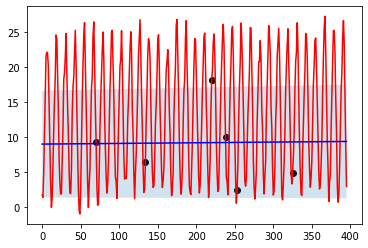

 57%|█████▋    | 113994/200000 [19:07<13:25, 106.81it/s]

Mean loss at epoch 114000 : 3.174452304840088
True
 Validation loss after 114000 equals 3.2220840752124786


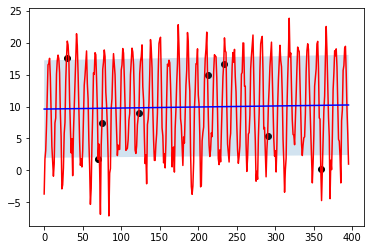

 57%|█████▊    | 115000/200000 [19:17<13:42, 103.40it/s]

Mean loss at epoch 115000 : 3.055814743041992
True
 Validation loss after 115000 equals 3.1917437314987183


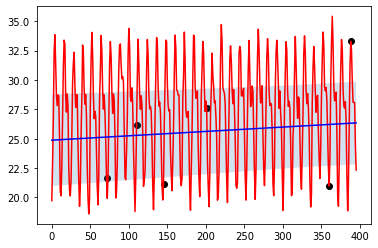

 58%|█████▊    | 115992/200000 [19:27<13:36, 102.83it/s]

Mean loss at epoch 116000 : 3.131788492202759
True
 Validation loss after 116000 equals 3.2027042508125305


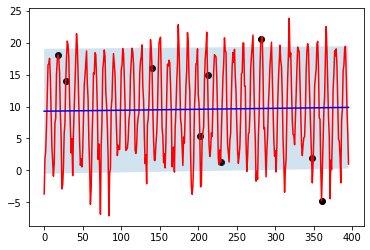

 58%|█████▊    | 116996/200000 [19:37<13:01, 106.26it/s]

Mean loss at epoch 117000 : 3.180630922317505
True
 Validation loss after 117000 equals 3.2137001752853394


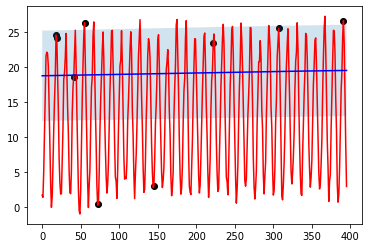

 59%|█████▉    | 117992/200000 [19:47<13:32, 100.99it/s]

Mean loss at epoch 118000 : 2.975224733352661
True
 Validation loss after 118000 equals 3.4032628536224365


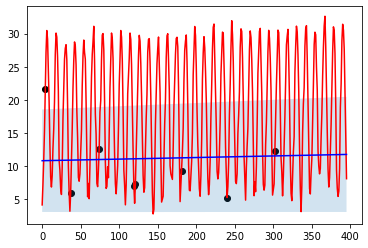

 59%|█████▉    | 118993/200000 [19:57<13:19, 101.34it/s]

Mean loss at epoch 119000 : 3.3613357543945312
True
 Validation loss after 119000 equals 3.2199729084968567


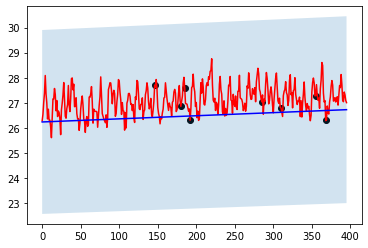

 60%|█████▉    | 119995/200000 [20:08<12:52, 103.54it/s]

Mean loss at epoch 120000 : 2.7010326385498047
True
 Validation loss after 120000 equals 3.7896996438503265


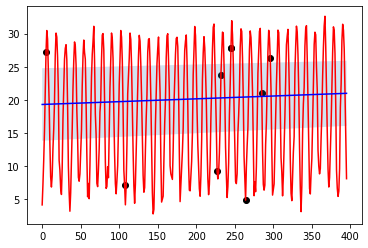

 60%|██████    | 120993/200000 [20:18<12:22, 106.37it/s]

Mean loss at epoch 121000 : 3.3071212768554688
True
 Validation loss after 121000 equals 3.205082416534424


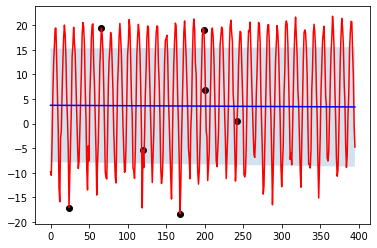

 61%|██████    | 121991/200000 [20:28<12:49, 101.43it/s]

Mean loss at epoch 122000 : 3.0149500370025635
True
 Validation loss after 122000 equals 3.2162565290927887


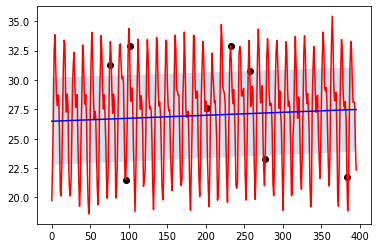

 61%|██████▏   | 122996/200000 [20:39<13:45, 93.32it/s] 

Mean loss at epoch 123000 : 3.200666904449463
True
 Validation loss after 123000 equals 3.245838701725006


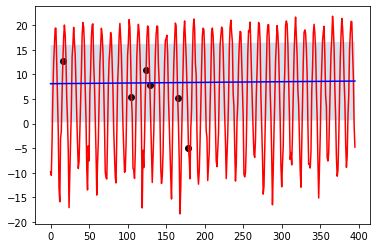

 62%|██████▏   | 124000/200000 [20:50<12:26, 101.82it/s]

Mean loss at epoch 124000 : 3.1573755741119385
True
 Validation loss after 124000 equals 3.1870161592960358


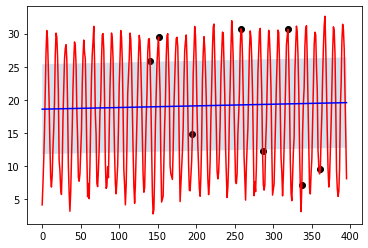

 62%|██████▏   | 124992/200000 [21:00<12:48, 97.58it/s] 

Mean loss at epoch 125000 : 3.114131212234497
True
 Validation loss after 125000 equals 3.131623476743698


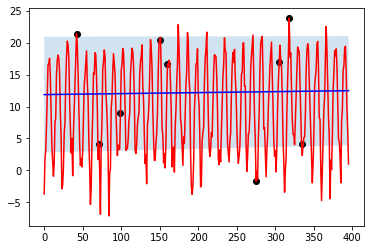

 63%|██████▎   | 125991/200000 [21:10<11:52, 103.91it/s]

Mean loss at epoch 126000 : 3.1611833572387695
True
 Validation loss after 126000 equals 3.1597506999969482


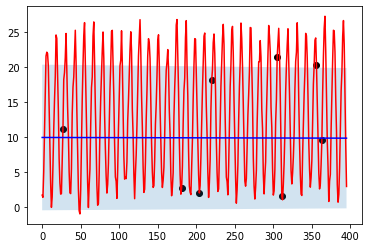

 63%|██████▎   | 126991/200000 [21:20<12:46, 95.24it/s] 

Mean loss at epoch 127000 : 3.100759983062744
True
 Validation loss after 127000 equals 3.213978111743927


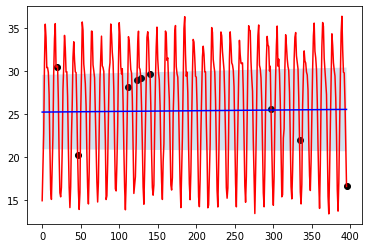

 64%|██████▍   | 127996/200000 [21:30<11:31, 104.18it/s]

Mean loss at epoch 128000 : 3.083381414413452
True
 Validation loss after 128000 equals 3.3295003473758698


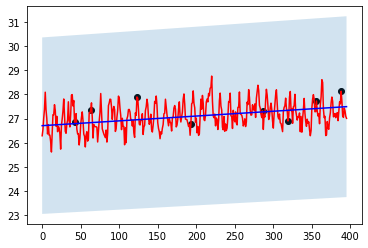

 64%|██████▍   | 128998/200000 [21:41<11:46, 100.54it/s]

Mean loss at epoch 129000 : 2.998021364212036
True
 Validation loss after 129000 equals 3.7359777987003326


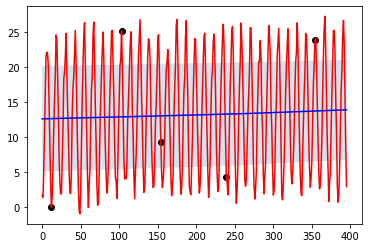

 65%|██████▍   | 129995/200000 [21:51<11:10, 104.43it/s]

Mean loss at epoch 130000 : 3.2700653076171875
True
 Validation loss after 130000 equals 3.2509390115737915


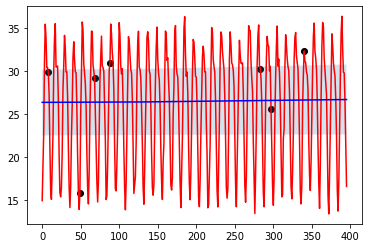

 65%|██████▌   | 130998/200000 [22:01<11:05, 103.67it/s]

Mean loss at epoch 131000 : 3.050311803817749
True
 Validation loss after 131000 equals 3.1501366198062897


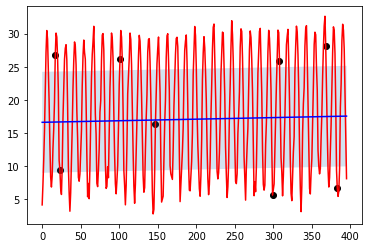

 66%|██████▌   | 131999/200000 [22:11<11:04, 102.35it/s]

Mean loss at epoch 132000 : 3.11862850189209
True
 Validation loss after 132000 equals 3.2405364513397217


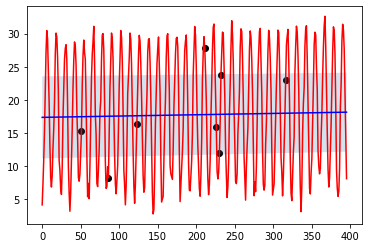

 66%|██████▋   | 132998/200000 [22:21<10:56, 102.00it/s]

Mean loss at epoch 133000 : 3.0571489334106445
True
 Validation loss after 133000 equals 3.247775971889496


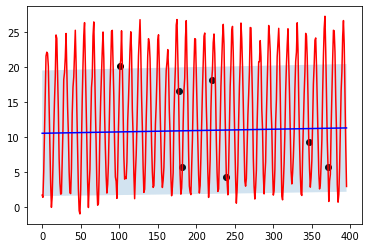

 67%|██████▋   | 133992/200000 [22:31<11:26, 96.20it/s] 

Mean loss at epoch 134000 : 3.127946138381958
True
 Validation loss after 134000 equals 3.146396219730377


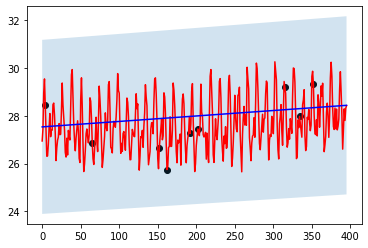

 67%|██████▋   | 134996/200000 [22:45<30:26, 35.60it/s]  

Mean loss at epoch 135000 : 3.261187791824341
True
 Validation loss after 135000 equals 3.2278541326522827


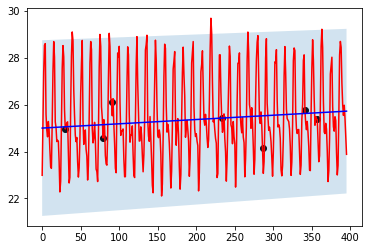

 68%|██████▊   | 135994/200000 [22:56<12:20, 86.41it/s]  

Mean loss at epoch 136000 : 3.22244930267334
True
 Validation loss after 136000 equals 3.2415041029453278


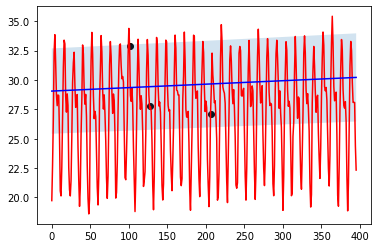

 68%|██████▊   | 136997/200000 [23:06<10:24, 100.81it/s]

Mean loss at epoch 137000 : 3.517789363861084
True
 Validation loss after 137000 equals 3.185789853334427


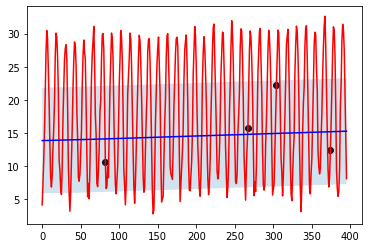

 69%|██████▉   | 137990/200000 [23:16<09:49, 105.27it/s]

Mean loss at epoch 138000 : 3.1638712882995605
True
 Validation loss after 138000 equals 3.174292504787445


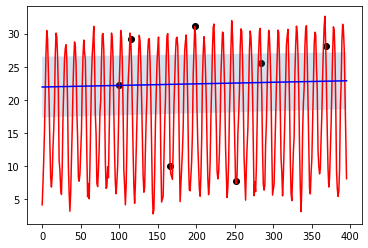

 69%|██████▉   | 138991/200000 [23:26<10:29, 96.96it/s] 

Mean loss at epoch 139000 : 3.2986843585968018
True
 Validation loss after 139000 equals 3.4294477701187134


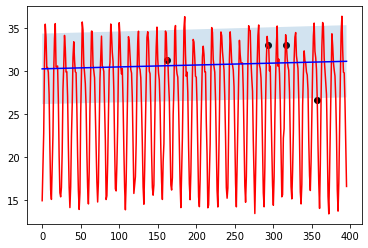

 70%|███████   | 140000/200000 [23:37<10:07, 98.71it/s] 

Mean loss at epoch 140000 : 2.990767478942871
True
 Validation loss after 140000 equals 3.238787591457367


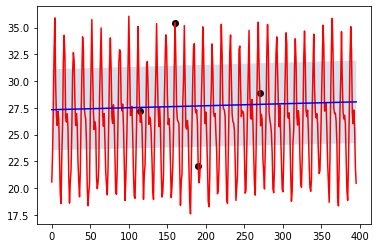

 70%|███████   | 140999/200000 [23:47<09:28, 103.86it/s]

Mean loss at epoch 141000 : 3.1454105377197266
True
 Validation loss after 141000 equals 3.501624345779419


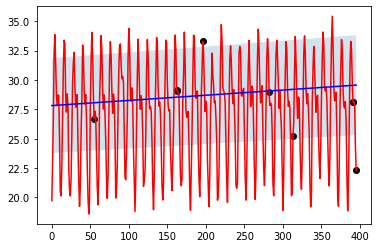

 71%|███████   | 141994/200000 [23:57<10:07, 95.54it/s] 

Mean loss at epoch 142000 : 3.226785182952881
True
 Validation loss after 142000 equals 3.2274734675884247


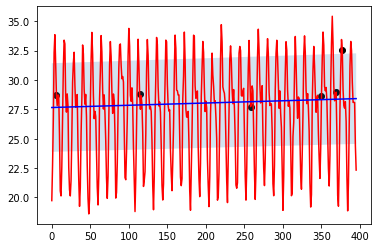

 71%|███████▏  | 142996/200000 [24:07<09:22, 101.43it/s]

Mean loss at epoch 143000 : 3.087034225463867
True
 Validation loss after 143000 equals 3.215214967727661


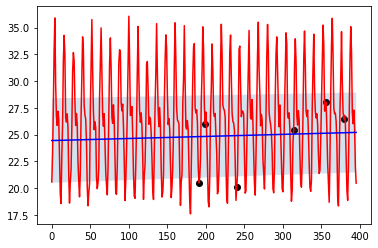

 72%|███████▏  | 143993/200000 [24:17<09:53, 94.37it/s] 

Mean loss at epoch 144000 : 3.2924551963806152
True
 Validation loss after 144000 equals 3.158391922712326


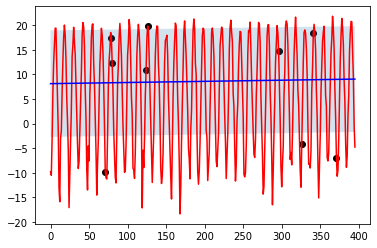

 72%|███████▏  | 144990/200000 [24:27<09:02, 101.49it/s]

Mean loss at epoch 145000 : 3.08733868598938
True
 Validation loss after 145000 equals 3.1983097195625305


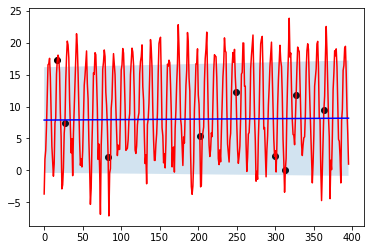

 73%|███████▎  | 145992/200000 [24:38<10:35, 84.96it/s] 

Mean loss at epoch 146000 : 3.1432652473449707
True
 Validation loss after 146000 equals 3.6061165928840637


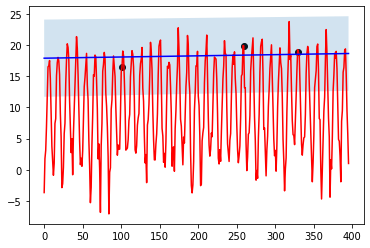

 73%|███████▎  | 146999/200000 [24:50<08:51, 99.67it/s] 

Mean loss at epoch 147000 : 3.0988214015960693
True
 Validation loss after 147000 equals 3.1576101779937744


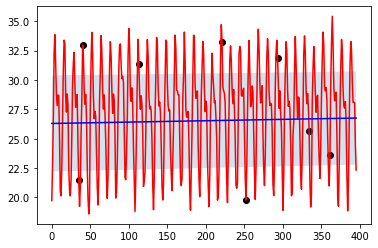

 74%|███████▍  | 147997/200000 [25:01<08:22, 103.39it/s]

Mean loss at epoch 148000 : 3.130086898803711
True
 Validation loss after 148000 equals 3.211087793111801


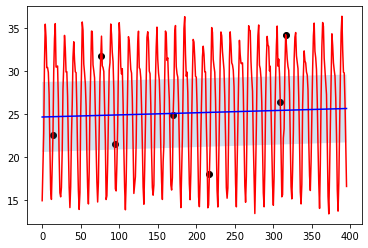

 74%|███████▍  | 148991/200000 [25:11<08:19, 102.13it/s]

Mean loss at epoch 149000 : 3.2607460021972656
True
 Validation loss after 149000 equals 3.2308442294597626


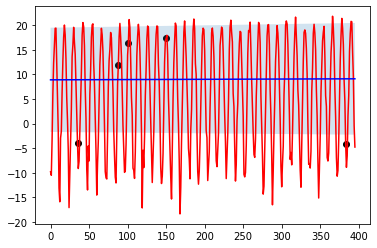

 75%|███████▌  | 150000/200000 [25:21<08:34, 97.28it/s] 

Mean loss at epoch 150000 : 3.2132210731506348
True
 Validation loss after 150000 equals 3.2316575050354004


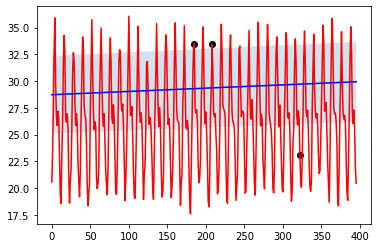

 75%|███████▌  | 150993/200000 [25:32<08:17, 98.53it/s] 

Mean loss at epoch 151000 : 3.0266199111938477
True
 Validation loss after 151000 equals 3.2332599461078644


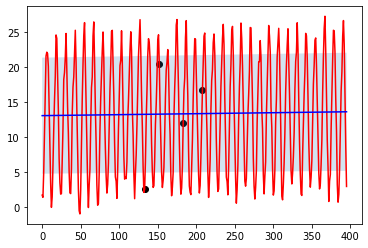

 76%|███████▌  | 151998/200000 [25:42<08:07, 98.53it/s] 

Mean loss at epoch 152000 : 3.139176368713379
True
 Validation loss after 152000 equals 3.2151244580745697


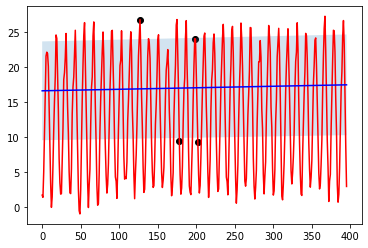

 76%|███████▋  | 152998/200000 [25:53<08:20, 93.97it/s] 

Mean loss at epoch 153000 : 3.161348819732666
True
 Validation loss after 153000 equals 3.2521401047706604


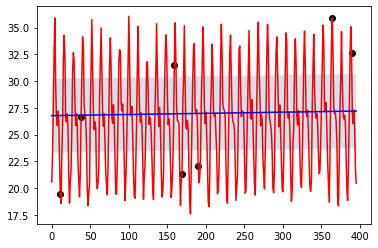

 77%|███████▋  | 153991/200000 [26:03<07:33, 101.40it/s]

Mean loss at epoch 154000 : 3.039327383041382
True
 Validation loss after 154000 equals 3.16727751493454


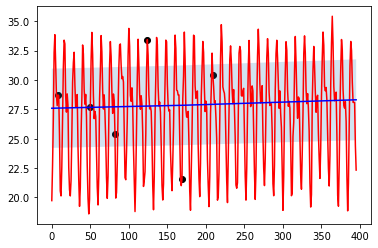

 77%|███████▋  | 154997/200000 [26:14<07:33, 99.18it/s] 

Mean loss at epoch 155000 : 3.1876842975616455
True
 Validation loss after 155000 equals 3.177968144416809


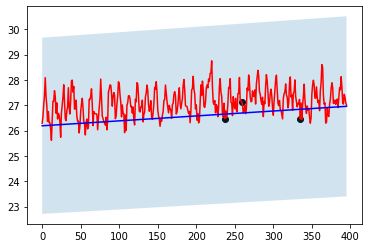

 78%|███████▊  | 155999/200000 [26:24<07:31, 97.36it/s] 

Mean loss at epoch 156000 : 3.063936710357666
True
 Validation loss after 156000 equals 3.1613936722278595


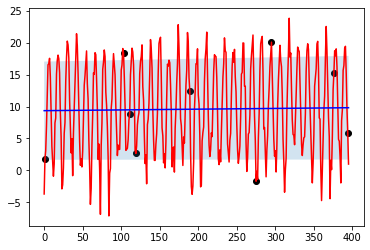

 78%|███████▊  | 156993/200000 [26:34<07:17, 98.33it/s] 

Mean loss at epoch 157000 : 3.135132074356079
True
 Validation loss after 157000 equals 3.1680709421634674


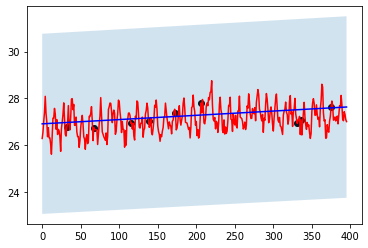

 79%|███████▉  | 157999/200000 [26:46<07:28, 93.65it/s]

Mean loss at epoch 158000 : 3.0996031761169434
True
 Validation loss after 158000 equals 3.1454891860485077


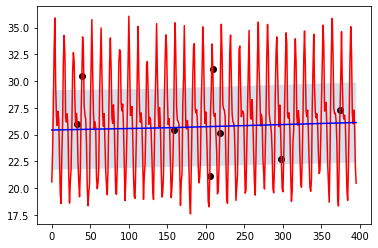

 79%|███████▉  | 158998/200000 [26:57<07:13, 94.48it/s] 

Mean loss at epoch 159000 : 3.180647373199463
True
 Validation loss after 159000 equals 3.4144481420516968


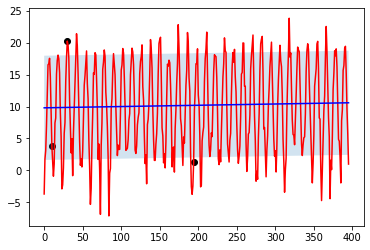

 80%|███████▉  | 159992/200000 [27:07<07:03, 94.57it/s] 

Mean loss at epoch 160000 : 3.086594343185425
True
 Validation loss after 160000 equals 3.192322701215744


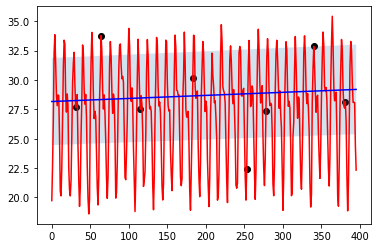

 80%|████████  | 160995/200000 [27:18<06:31, 99.59it/s] 

Mean loss at epoch 161000 : 3.229095220565796
True
 Validation loss after 161000 equals 3.191235363483429


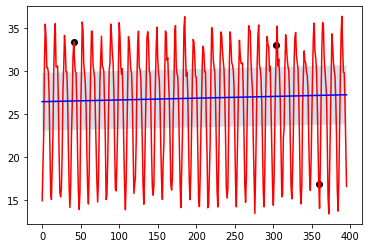

 81%|████████  | 161997/200000 [27:28<07:32, 83.97it/s] 

Mean loss at epoch 162000 : 2.9752025604248047
True
 Validation loss after 162000 equals 3.4671905040740967


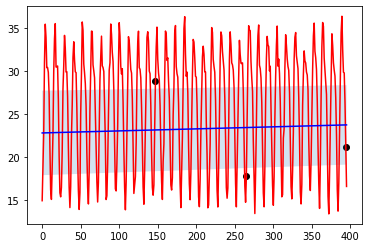

 81%|████████▏ | 162993/200000 [27:39<06:18, 97.66it/s] 

Mean loss at epoch 163000 : 2.9798460006713867
True
 Validation loss after 163000 equals 3.194778472185135


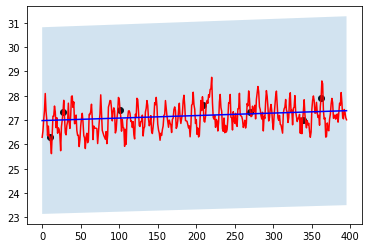

 82%|████████▏ | 163997/200000 [27:51<06:04, 98.89it/s] 

Mean loss at epoch 164000 : 3.292435646057129
True
 Validation loss after 164000 equals 3.264665722846985


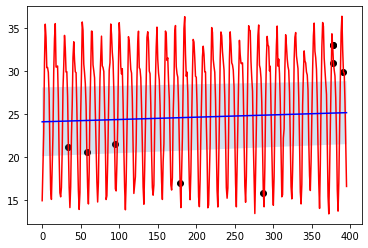

 82%|████████▏ | 164993/200000 [28:01<06:05, 95.84it/s] 

Mean loss at epoch 165000 : 3.1651079654693604
True
 Validation loss after 165000 equals 3.1913729906082153


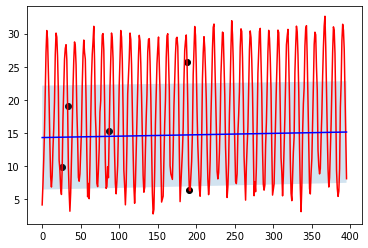

 83%|████████▎ | 165995/200000 [28:11<05:46, 98.04it/s] 

Mean loss at epoch 166000 : 3.02932071685791
True
 Validation loss after 166000 equals 3.3540380001068115


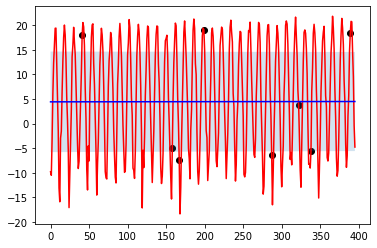

 83%|████████▎ | 166995/200000 [28:21<06:54, 79.63it/s] 

Mean loss at epoch 167000 : 3.1445717811584473
True
 Validation loss after 167000 equals 3.1884377896785736


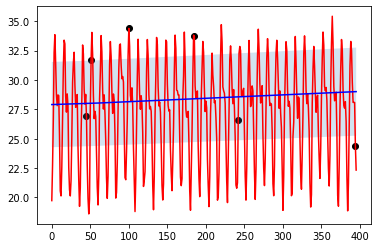

 84%|████████▍ | 167991/200000 [28:31<05:41, 93.59it/s] 

Mean loss at epoch 168000 : 3.3480446338653564
True
 Validation loss after 168000 equals 3.380995362997055


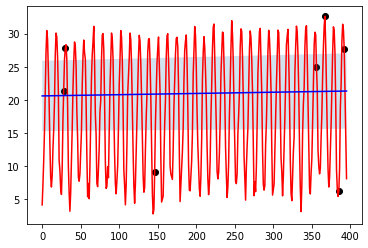

 84%|████████▍ | 168993/200000 [28:43<06:39, 77.71it/s] 

Mean loss at epoch 169000 : 3.2274506092071533
True
 Validation loss after 169000 equals 3.3030867278575897


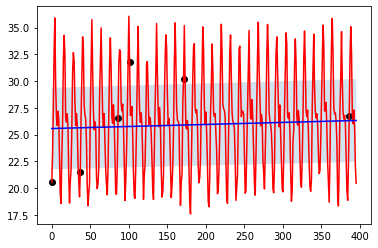

 85%|████████▍ | 169991/200000 [28:54<05:07, 97.61it/s] 

Mean loss at epoch 170000 : 3.185678720474243
True
 Validation loss after 170000 equals 3.2747527360916138


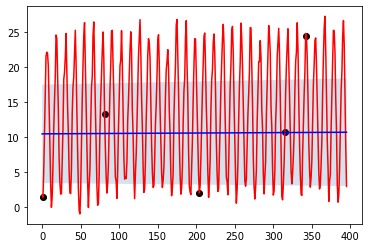

 85%|████████▌ | 170991/200000 [29:04<05:16, 91.78it/s] 

Mean loss at epoch 171000 : 2.9794058799743652
True
 Validation loss after 171000 equals 3.1320191621780396


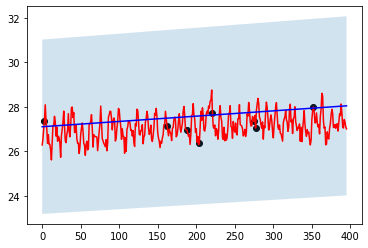

 86%|████████▌ | 171996/200000 [29:15<04:41, 99.47it/s] 

Mean loss at epoch 172000 : 3.1246042251586914
True
 Validation loss after 172000 equals 3.1906216144561768


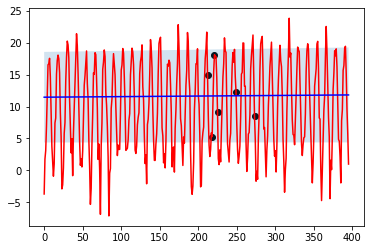

 86%|████████▋ | 172997/200000 [29:25<04:42, 95.73it/s] 

Mean loss at epoch 173000 : 3.1368017196655273
True
 Validation loss after 173000 equals 3.2728713154792786


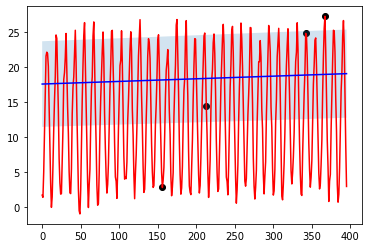

 87%|████████▋ | 173996/200000 [29:36<04:20, 99.99it/s] 

Mean loss at epoch 174000 : 3.3369691371917725
True
 Validation loss after 174000 equals 3.3141655325889587


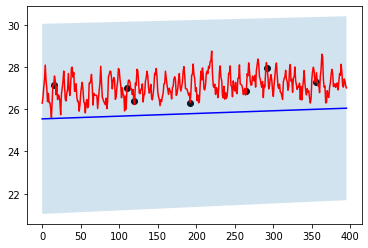

 87%|████████▋ | 174998/200000 [29:46<04:15, 97.75it/s] 

Mean loss at epoch 175000 : 3.2684543132781982
True
 Validation loss after 175000 equals 3.207912355661392


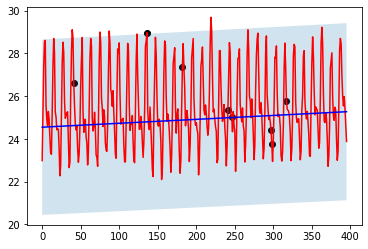

 88%|████████▊ | 175990/200000 [29:56<03:58, 100.48it/s]

Mean loss at epoch 176000 : 3.195678949356079
True
 Validation loss after 176000 equals 3.298271954059601


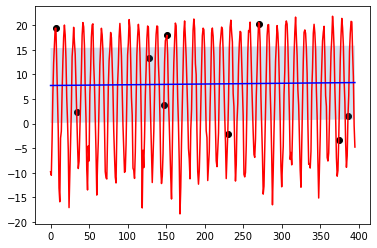

 88%|████████▊ | 176999/200000 [30:07<04:00, 95.45it/s] 

Mean loss at epoch 177000 : 3.199859142303467
True
 Validation loss after 177000 equals 3.241716682910919


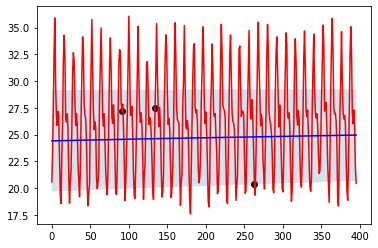

 89%|████████▉ | 177995/200000 [30:18<03:34, 102.77it/s]

Mean loss at epoch 178000 : 3.2182350158691406
True
 Validation loss after 178000 equals 3.1796890199184418


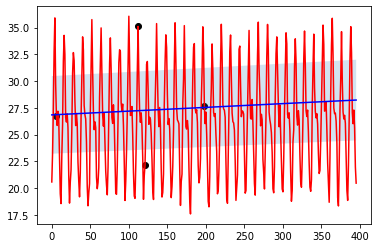

 89%|████████▉ | 178990/200000 [30:28<03:31, 99.39it/s] 

Mean loss at epoch 179000 : 3.2384791374206543
True
 Validation loss after 179000 equals 3.2236740589141846


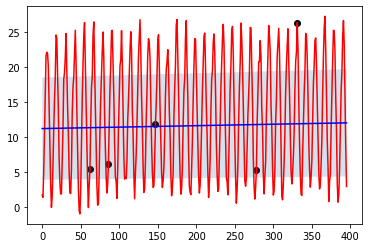

 90%|████████▉ | 179996/200000 [30:39<03:47, 87.89it/s] 

Mean loss at epoch 180000 : 3.4152233600616455
True
 Validation loss after 180000 equals 3.2360201478004456


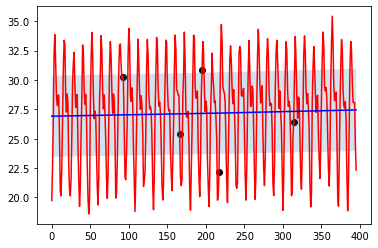

 90%|█████████ | 180992/200000 [30:51<03:11, 99.12it/s] 

Mean loss at epoch 181000 : 2.9526567459106445
True
 Validation loss after 181000 equals 3.2270943224430084


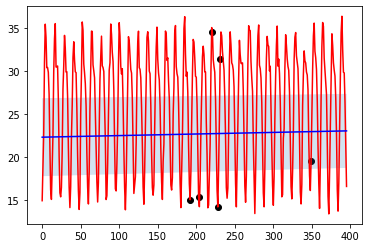

 91%|█████████ | 181993/200000 [31:01<02:54, 102.91it/s]

Mean loss at epoch 182000 : 3.233886957168579
True
 Validation loss after 182000 equals 3.1880966126918793


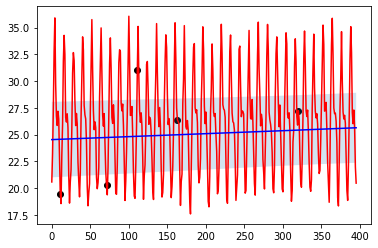

 91%|█████████▏| 182994/200000 [31:12<03:05, 91.77it/s] 

Mean loss at epoch 183000 : 3.0469353199005127
True
 Validation loss after 183000 equals 3.1956731379032135


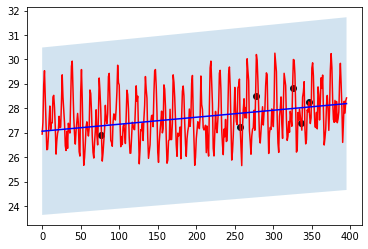

 92%|█████████▏| 183995/200000 [31:22<02:48, 94.78it/s] 

Mean loss at epoch 184000 : 2.638960838317871
True
 Validation loss after 184000 equals 3.3326387107372284


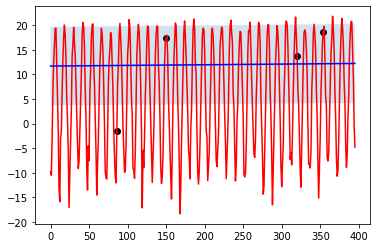

 92%|█████████▏| 184995/200000 [31:33<02:45, 90.50it/s] 

Mean loss at epoch 185000 : 3.2309818267822266
True
 Validation loss after 185000 equals 3.1742542684078217


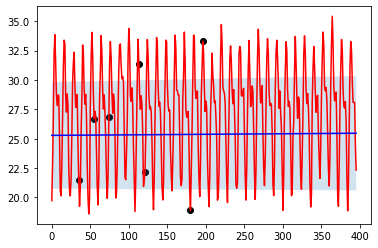

 93%|█████████▎| 185997/200000 [31:43<02:23, 97.86it/s] 

Mean loss at epoch 186000 : 3.138768196105957
True
 Validation loss after 186000 equals 3.1860769987106323


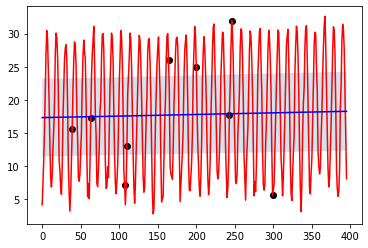

 94%|█████████▎| 187000/200000 [31:53<02:09, 100.64it/s]

Mean loss at epoch 187000 : 3.172370433807373
True
 Validation loss after 187000 equals 3.2282051742076874


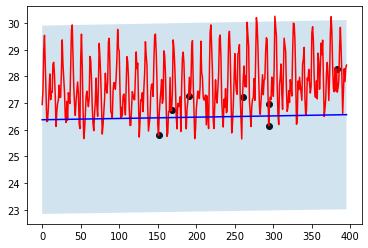

 94%|█████████▍| 187992/200000 [32:04<01:57, 102.02it/s]

Mean loss at epoch 188000 : 3.2152462005615234
True
 Validation loss after 188000 equals 3.219926953315735


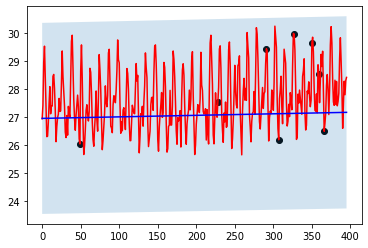

 94%|█████████▍| 189000/200000 [32:14<01:50, 99.74it/s] 

Mean loss at epoch 189000 : 3.1723132133483887
True
 Validation loss after 189000 equals 3.169902056455612


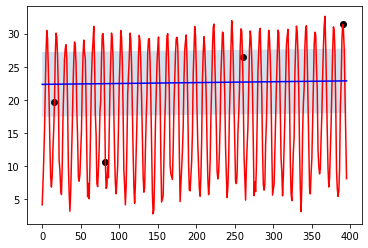

 95%|█████████▍| 189994/200000 [32:25<01:36, 103.34it/s]

Mean loss at epoch 190000 : 3.150651454925537
True
 Validation loss after 190000 equals 3.1428230106830597


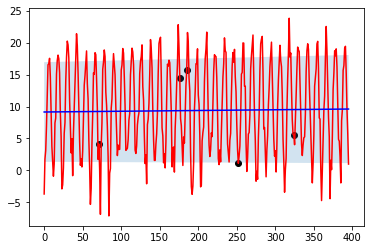

 95%|█████████▌| 190991/200000 [32:35<02:24, 62.23it/s] 

Mean loss at epoch 191000 : 3.2232272624969482
True
 Validation loss after 191000 equals 3.243097275495529


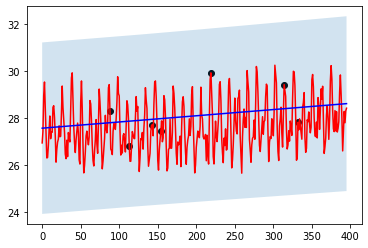

 96%|█████████▌| 191993/200000 [32:49<01:28, 90.54it/s] 

Mean loss at epoch 192000 : 3.227497100830078
True
 Validation loss after 192000 equals 3.281868636608124


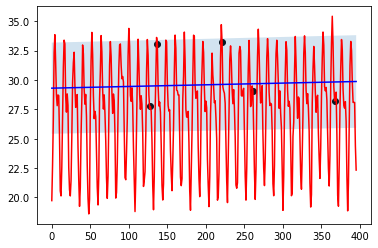

 96%|█████████▋| 192992/200000 [33:00<01:13, 95.71it/s] 

Mean loss at epoch 193000 : 2.9822628498077393
True
 Validation loss after 193000 equals 3.414393186569214


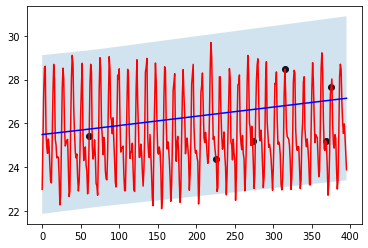

 97%|█████████▋| 193991/200000 [33:10<01:00, 98.51it/s] 

Mean loss at epoch 194000 : 3.2935848236083984
True
 Validation loss after 194000 equals 3.171475648880005


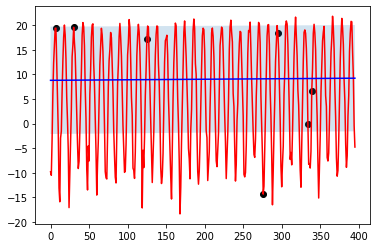

 97%|█████████▋| 194994/200000 [33:21<00:52, 94.64it/s] 

Mean loss at epoch 195000 : 3.3325889110565186
True
 Validation loss after 195000 equals 3.1770125329494476


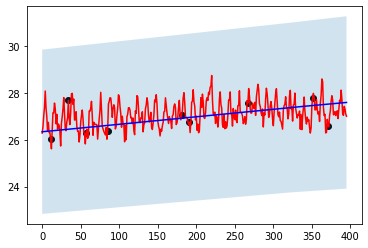

 98%|█████████▊| 195998/200000 [33:31<00:39, 101.31it/s]

Mean loss at epoch 196000 : 3.0015249252319336
True
 Validation loss after 196000 equals 3.3423991799354553


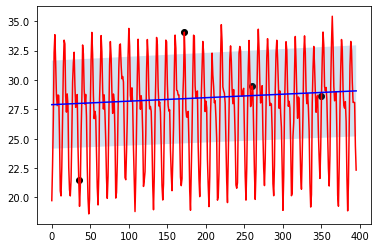

 98%|█████████▊| 196993/200000 [33:41<00:29, 101.24it/s]

Mean loss at epoch 197000 : 3.090038299560547
True
 Validation loss after 197000 equals 3.1879266798496246


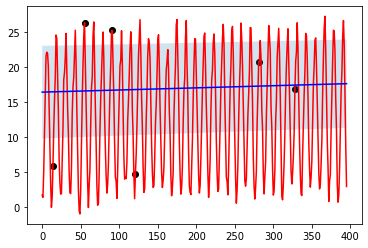

 99%|█████████▉| 197995/200000 [33:52<00:19, 102.05it/s]

Mean loss at epoch 198000 : 3.2191545963287354
True
 Validation loss after 198000 equals 3.2836619317531586


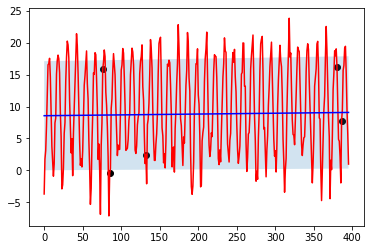

 99%|█████████▉| 198990/200000 [34:02<00:10, 99.06it/s] 

Mean loss at epoch 199000 : 3.35595703125
True
 Validation loss after 199000 equals 3.396039664745331


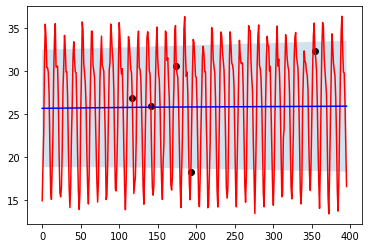

100%|██████████| 200000/200000 [34:12<00:00, 97.45it/s] 


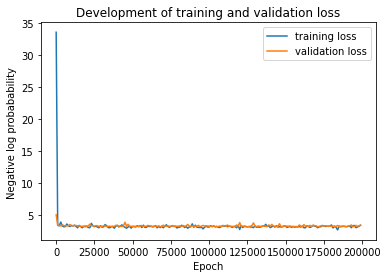

In [11]:
model_weights = trainer.run_training(trainloader, valiloader=valiloader, plotting=True)


